In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import silhouette_score

# Split data into training and validation sets
X_train, X_val = train_test_split(scaled_data, test_size=0.2, random_state=42)

# Define a function to create the model with desired hyperparameters
def create_model(learning_rate, latent_dim, n_clusters):
    input_layer = Input(shape=(input_dim,))
    encoder = Dense(latent_dim, activation='relu')(input_layer)
    decoder = Dense(input_dim, activation='sigmoid')(encoder)
    model = Model(inputs=input_layer, outputs=decoder)
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mean_squared_error')
    return model

# Define a grid of hyperparameters to search over
learning_rates = [0.001, 0.01, 0.1]
latent_dims = [5, 10, 15]
n_clusters_list = [2, 3, 4]

best_silhouette_score = -1
best_model = None

# Iterate over different hyperparameter combinations
for learning_rate in learning_rates:
    for latent_dim in latent_dims:
        for n_clusters in n_clusters_list:
            # Create and train the model
            model = create_model(learning_rate, latent_dim, n_clusters)
            model.fit(X_train, X_train, batch_size=32, epochs=50, validation_data=(X_val, X_val))

            # Get encoded data from the intermediate layer
            encoder_model = Model(inputs=model.input, outputs=model.layers[1].output)
            encoded_data = encoder_model.predict(scaled_data)

            # Cluster assignment
            cluster_labels = np.argmax(model.predict(scaled_data), axis=1)

            # Check if there are at least 2 unique labels
            unique_labels = np.unique(cluster_labels)
            if len(unique_labels) < 2:
                continue  # Skip this configuration if there are not enough unique labels

            # Calculate the silhouette score
            score = silhouette_score(encoded_data, cluster_labels)

            # Check if this hyperparameter configuration is the best so far
            if score > best_silhouette_score:
                best_silhouette_score = score
                best_model = model

# Print the best hyperparameter configuration and its corresponding silhouette score
print("Best Hyperparameters:")
print("Learning Rate:", best_model.optimizer.learning_rate.numpy())
print("Latent Dimension:", best_model.layers[1].output_shape[1])
print("Number of Clusters:", best_model.output_shape[1])
print("Best Silhouette Score:", best_silhouette_score)


Epoch 1/50
68/68 [==============================] - 1s 5ms/step - loss: 0.1824 - val_loss: 0.1643
Epoch 2/50
68/68 [==============================] - 0s 4ms/step - loss: 0.1451 - val_loss: 0.1209
Epoch 3/50
68/68 [==============================] - 0s 4ms/step - loss: 0.1013 - val_loss: 0.0793
Epoch 4/50
68/68 [==============================] - 0s 3ms/step - loss: 0.0648 - val_loss: 0.0494
Epoch 5/50
68/68 [==============================] - 0s 4ms/step - loss: 0.0410 - val_loss: 0.0319
Epoch 6/50
68/68 [==============================] - 0s 3ms/step - loss: 0.0275 - val_loss: 0.0223
Epoch 7/50
68/68 [==============================] - 0s 3ms/step - loss: 0.0200 - val_loss: 0.0169
Epoch 8/50
68/68 [==============================] - 0s 3ms/step - loss: 0.0158 - val_loss: 0.0138
Epoch 9/50
68/68 [==============================] - 0s 3ms/step - loss: 0.0133 - val_loss: 0.0118
Epoch 10/50
68/68 [==============================] - 0s 3ms/step - loss: 0.0116 - val_loss: 0.0105
Epoch 11/50
68/68 [

In [ ]:
rounded_score = round(silhouette_score, 2)
print("Best Silhoette score =",rounded_score)

Best Silhoette score = 0.84


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [ ]:
# import tensorflow as tf
# print(tf.__version__)

In [ ]:
# Read the data file(s) using pandas
completeclean = pd.read_excel("Finalcompletecleandata.xlsx")
completeclean.shape
completeclean.drop(columns=["Unnamed: 0","Ease_of_Business",'Key'],inplace=True)
data=completeclean

In [ ]:


# # Data preparation
# # Assume 'data' contains the given data
# data = data.drop('Country', axis=1)  # Remove 'Country' column
# scaler = MinMaxScaler()
# scaled_data = scaler.fit_transform(data)

# # Model architecture
# input_dim = scaled_data.shape[1]
# latent_dim = 10  # Define the dimension of the latent space
# n_clusters = 5  # Define the number of clusters

# input_layer = Input(shape=(input_dim,))
# encoder = Dense(latent_dim, activation='relu')(input_layer)
# clustering_layer = Dense(n_clusters, activation='softmax')(encoder)

# model = Model(inputs=input_layer, outputs=clustering_layer)
# model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')  # Use appropriate loss function
# model.fit(scaled_data, scaled_data, batch_size=32, epochs=50)  # Use input data as both input and target
# # Cluster assignment
# encoder_model = Model(inputs=input_layer, outputs=encoder)
# encoded_data = encoder_model.predict(scaled_data)
# cluster_labels = np.argmax(model.predict(scaled_data), axis=1)

# # Evaluation
# silhouette_score = silhouette_score(encoded_data, cluster_labels)
# print("Silhouette Score: ", silhouette_score)


In [ ]:
# Data preparation
# Assume 'data' contains the given data
data = data.drop('Country', axis=1)  # Remove 'Country' column
data=data[['GDP','Health_Exp__GDP', 'Tourism_Inbound', 'Tourism_Outbound',"Lending_Interest"]]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Model architecture
input_dim = scaled_data.shape[1]
latent_dim = 5  # Define the dimension of the latent space
n_clusters = 5  # Define the number of clusters

input_layer = Input(shape=(input_dim,))
encoder = Dense(latent_dim, activation='relu')(input_layer)
decoder = Dense(input_dim, activation='sigmoid')(encoder)

model = Model(inputs=input_layer, outputs=decoder)

# Training
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')
model.fit(scaled_data, scaled_data, batch_size=32, epochs=50)  # Use input data as both input and target

# Cluster assignment
encoder_model = Model(inputs=input_layer, outputs=encoder)
encoded_data = encoder_model.predict(scaled_data)
cluster_labels = np.argmax(model.predict(scaled_data), axis=1)

# Evaluation
silhouette_score = silhouette_score(encoded_data, cluster_labels)
print("Silhouette Score: ", round(silhouette_score, 2))


Epoch 1/50
85/85 [==============================] - 1s 2ms/step - loss: 0.1679
Epoch 2/50
85/85 [==============================] - 0s 2ms/step - loss: 0.1273
Epoch 3/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0885
Epoch 4/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0591
Epoch 5/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0398
Epoch 6/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0280
Epoch 7/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0209
Epoch 8/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0164
Epoch 9/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 10/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0117
Epoch 11/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 12/50
85/85 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 13/50
85/85 [==============================

Hyperparamenter Tuning to increase the Silhoutte score

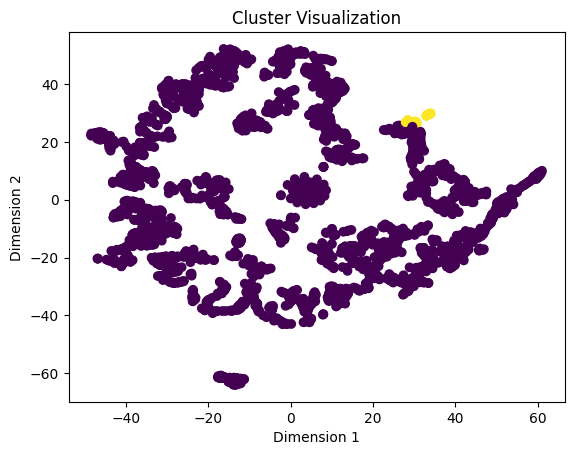

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce dimensionality of encoded data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_data = tsne.fit_transform(encoded_data)

# Plot the clusters
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=cluster_labels)
plt.title("Cluster Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


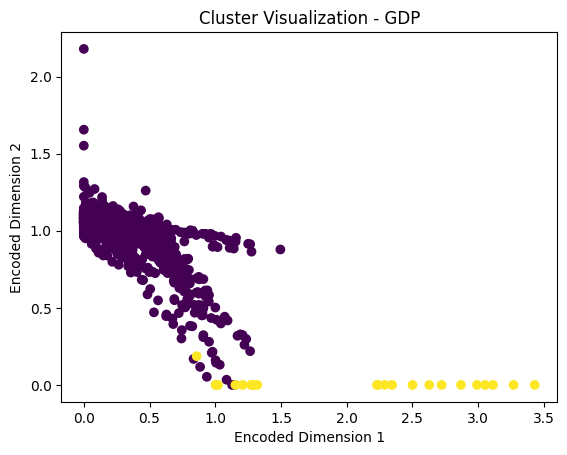

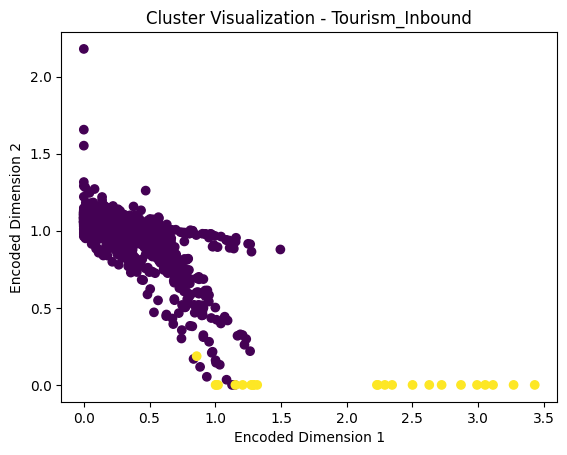

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for GDP
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=cluster_labels)
plt.title("Cluster Visualization - GDP")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()

# Scatter plot for Tourism_Inbound
plt.scatter(encoded_data[:, 0], encoded_data[:, 1], c=cluster_labels)
plt.title("Cluster Visualization - Tourism_Inbound")
plt.xlabel("Encoded Dimension 1")
plt.ylabel("Encoded Dimension 2")
plt.show()


VISUALIZATION FOR PROFILING

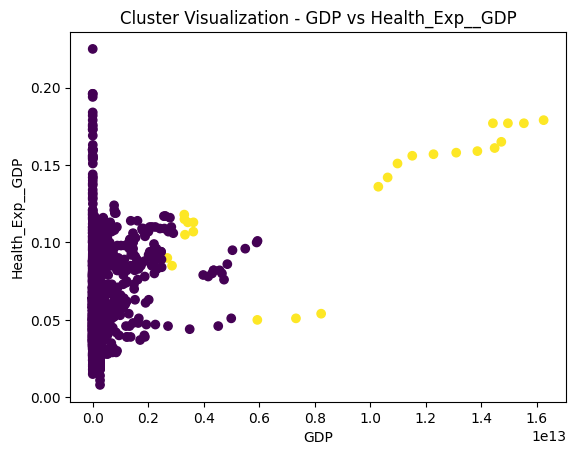

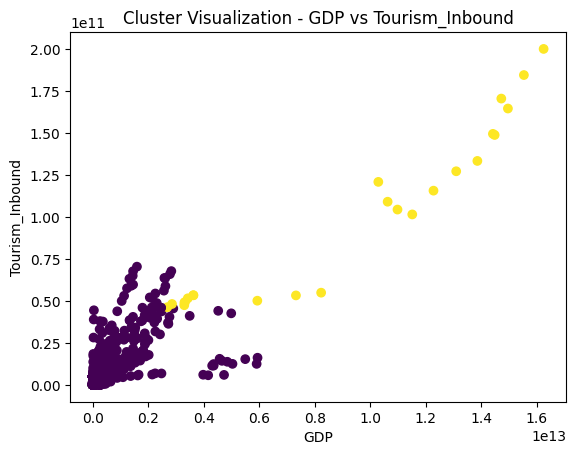

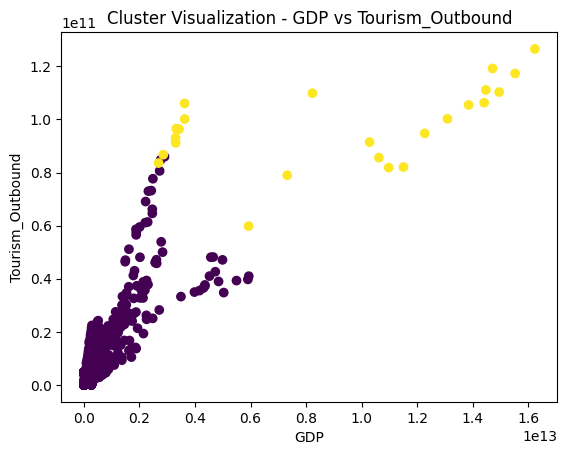

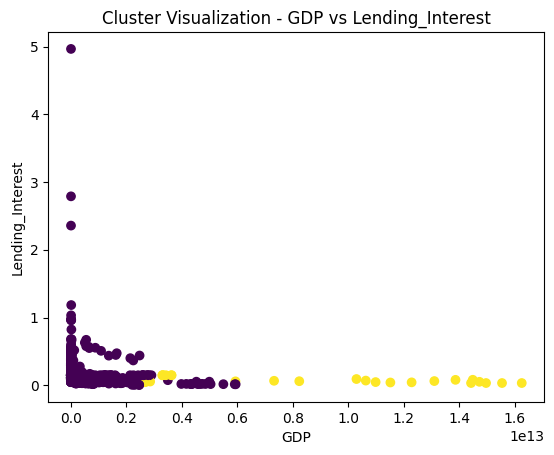

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot for GDP and Health_Exp__GDP
plt.scatter(data['GDP'], data['Health_Exp__GDP'], c=cluster_labels)
plt.title("Cluster Visualization - GDP vs Health_Exp__GDP")
plt.xlabel("GDP")
plt.ylabel("Health_Exp__GDP")
plt.show()

# Scatter plot for GDP and Tourism_Inbound
plt.scatter(data['GDP'], data['Tourism_Inbound'], c=cluster_labels)
plt.title("Cluster Visualization - GDP vs Tourism_Inbound")
plt.xlabel("GDP")
plt.ylabel("Tourism_Inbound")
plt.show()

# Scatter plot for GDP and Tourism_Outbound
plt.scatter(data['GDP'], data['Tourism_Outbound'], c=cluster_labels)
plt.title("Cluster Visualization - GDP vs Tourism_Outbound")
plt.xlabel("GDP")
plt.ylabel("Tourism_Outbound")
plt.show()

# Scatter plot for GDP and Lending_Interest
plt.scatter(data['GDP'], data['Lending_Interest'], c=cluster_labels)
plt.title("Cluster Visualization - GDP vs Lending_Interest")
plt.xlabel("GDP")
plt.ylabel("Lending_Interest")
plt.show()


In [ ]:
completeclean['cluster']=cluster_labels
completeclean.head()
completeclean.to_excel("clusterDeepLearning.xlsx")

Profiling the clusters formed after clustering techniques

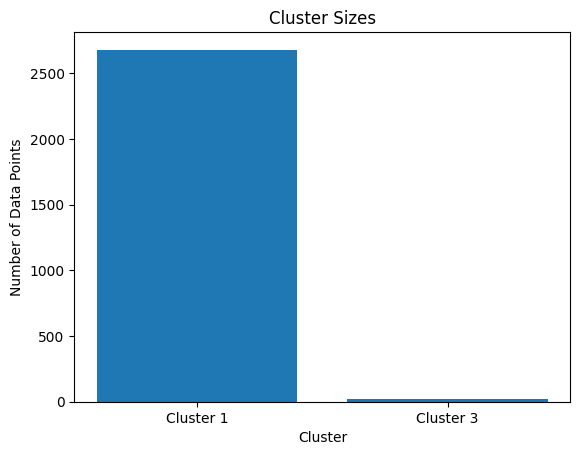

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Count the number of data points in each cluster
cluster_labels_unique, cluster_counts = np.unique(cluster_labels, return_counts=True)

# Generate labels for the clusters
cluster_labels_str = [f"Cluster {label}" for label in cluster_labels_unique]

# Plot the bar chart
plt.bar(range(len(cluster_labels_unique)), cluster_counts)
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.title('Cluster Sizes')
plt.xticks(range(len(cluster_labels_unique)), cluster_labels_str)
plt.show()


2. Cluster Characteristics: